In [6]:
# !pip install surya-ocr

# OCR with VikParuchuri/surya
- https://github.com/VikParuchuri/surya
- https://pypi.org/project/surya-ocr/

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from surya.detection import batch_inference
from surya.model.segformer import load_model, load_processor

In [8]:
# Load the OCR model
model, processor = load_model(), load_processor()

In [9]:
# Load the image
img_path = '../_data/resource/note_child.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Noise removal

In [10]:
# Load the image
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((2, 2))

# Apply Gaussian blur to reduce noise before Canny
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Apply Canny Edge Detector
edges = cv2.Canny(blurred, 50, 150)

# Dilate the edges to make text regions more contiguous
dilated = cv2.dilate(edges, kernel, iterations=1)

# Find and fill contours
contours, _ = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
filled = cv2.drawContours(np.zeros_like(img), contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Dilate agine
img_dilated = cv2.dilate(filled, kernel, iterations=1)

# Sharpen the image
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened = cv2.filter2D(img_dilated, -1, sharpen_kernel)

image = sharpened

### Ensure image has right properties

In [11]:
# ensure image is not grayscale
if image.ndim == 2: # Is image grayscale?
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
else:
    rgb_image = image

## Plot all images

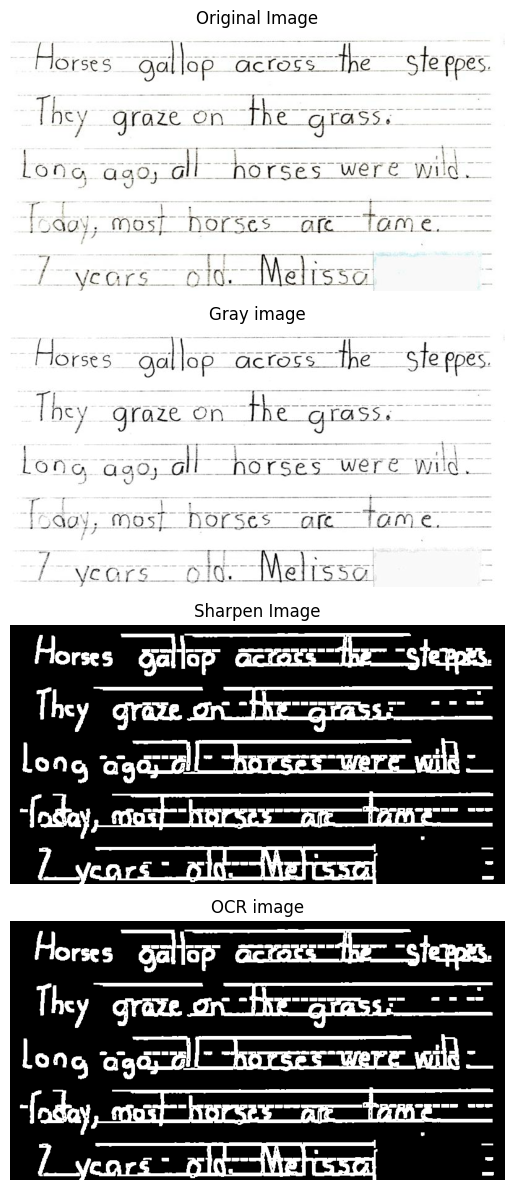

In [12]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12)) # 1 row, 3 columns

# Display each image in a subplot and set titles
axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(img_gray, 'gray')
axs[1].set_title('Gray image')

axs[2].imshow(sharpened)
axs[2].set_title('Sharpen Image')

axs[3].imshow(rgb_image)
axs[3].set_title('OCR image')

# Turn off the axes for all subplots in one go
for ax in axs:
    ax.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Perform OCR on np array

In [28]:
# OCR from image path
image = Image.open(img_path)
res_doc = batch_inference([image], model, processor)

In [30]:
# OCR from image
image = Image.fromarray(rgb_image)
res_image = batch_inference([image], model, processor)

## OCR result

In [31]:
res_doc

[{'bboxes': [[56, 39, 589, 66],
   [636, 36, 786, 65],
   [391, 121, 625, 161],
   [162, 125, 350, 152],
   [352, 205, 728, 236],
   [22, 211, 294, 243],
   [283, 293, 541, 324],
   [578, 291, 704, 324],
   [153, 298, 243, 322],
   [397, 363, 590, 422],
   [103, 383, 251, 411]],
  'polygons': [[[56, 39], [589, 37], [589, 66], [56, 68]],
   [[636, 36], [786, 38], [785, 65], [635, 63]],
   [[391, 121], [625, 130], [620, 161], [387, 152]],
   [[162, 125], [350, 125], [350, 152], [162, 152]],
   [[352, 205], [728, 204], [728, 236], [352, 237]],
   [[22, 211], [294, 212], [294, 243], [21, 242]],
   [[283, 293], [541, 293], [541, 324], [283, 324]],
   [[578, 291], [704, 296], [699, 324], [574, 319]],
   [[153, 298], [243, 298], [243, 322], [153, 322]],
   [[397, 363], [590, 384], [575, 422], [382, 402]],
   [[103, 383], [251, 383], [251, 411], [103, 411]]],
  'vertical_lines': [],
  'horizontal_lines': [],
  'heatmap': <PIL.Image.Image image mode=L size=896x896>,
  'affinity_map': <PIL.Image

In [32]:
res_image

[{'bboxes': [[198, 23, 776, 70],
   [52, 38, 176, 68],
   [156, 111, 646, 150],
   [675, 122, 730, 130],
   [730, 122, 765, 129],
   [136, 208, 723, 240],
   [34, 208, 136, 242],
   [155, 291, 571, 324],
   [42, 291, 139, 320],
   [566, 293, 734, 317],
   [733, 295, 779, 303],
   [280, 359, 585, 408],
   [100, 382, 240, 412]],
  'polygons': [[[198, 23], [776, 22], [776, 70], [199, 70]],
   [[52, 38], [176, 40], [175, 68], [51, 67]],
   [[156, 111], [646, 103], [648, 150], [158, 158]],
   [[675, 122], [730, 122], [730, 130], [675, 130]],
   [[730, 122], [765, 122], [765, 129], [730, 129]],
   [[136, 208], [723, 197], [726, 240], [139, 251]],
   [[34, 208], [136, 212], [132, 242], [29, 238]],
   [[155, 291], [571, 293], [571, 324], [155, 321]],
   [[42, 291], [139, 296], [134, 320], [38, 314]],
   [[566, 293], [734, 293], [734, 317], [566, 317]],
   [[733, 295], [779, 295], [779, 303], [733, 303]],
   [[280, 359], [585, 362], [584, 408], [278, 405]],
   [[100, 382], [240, 380], [241, 412

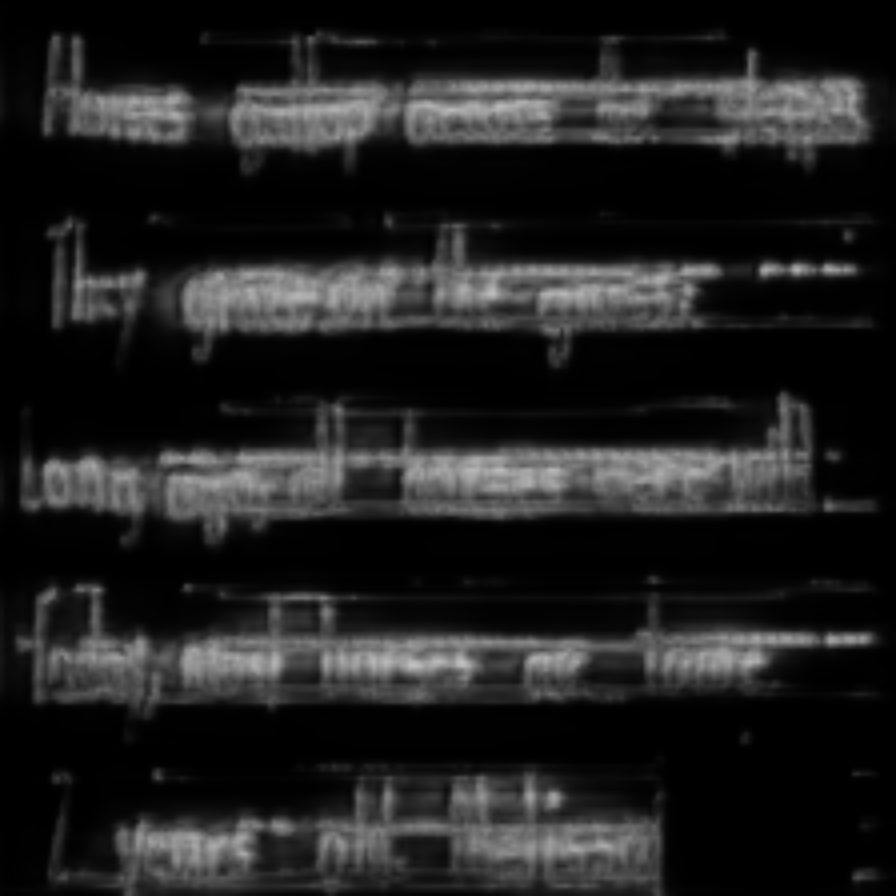

In [37]:
res_image[0]['heatmap']